In [1]:
# AA-Sim: Affirmative Action Simulation

In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
print("Equal Distribution of Applicants\n")

rng = np.random.default_rng(8222024112) # Standard seed for repeatability
#rng = np.random.default_rng(5) # test seed for resilliance

num_applicants = 100_000 # total number of applicants for each race

# Convert to IQ scores
w_dist = 15 * rng.standard_normal(num_applicants) + 100 # White applicants
b_dist = 15 * rng.standard_normal(num_applicants) + 100 # Black applicants

# Using this seed the distributions turn out the same, with the w_dist being (very) slightly lower
print(f"Black Applicant Average: {np.average(b_dist)}")
print(f"Black Applicant Std Dev: {np.std(b_dist)}")
print(f"White Applicant Average: {np.average(w_dist)}")
print(f"White Applicant Std Dev: {np.std(w_dist)}")

Equal Distribution of Applicants

Black Applicant Average: 99.98214610977116
Black Applicant Std Dev: 14.993450106893043
White Applicant Average: 99.92380981671447
White Applicant Std Dev: 14.971078742004442


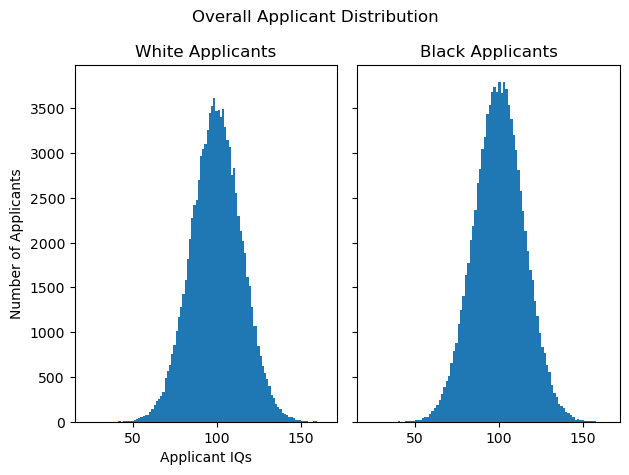

In [4]:
fig, axs = plt.subplots(1, 2, sharey=True, sharex=True, tight_layout=True)

fig.suptitle("Overall Applicant Distribution")

axs[0].set_title("White Applicants")
axs[1].set_title("Black Applicants")

axs[0].hist(w_dist, bins=100)
axs[1].hist(b_dist, bins=100)

axs[0].set_ylabel("Number of Applicants")
axs[0].set_xlabel("Applicant IQs")

plt.show()

In [5]:
print("Simulation 1.1: Equal Thresholds\n")

equal_threshold = 124.635 # value chosen through experimentation to ensure exactly 10,000 students

# Compare applicant to threshold, if over accept
b_accepted = b_dist[(b_dist > equal_threshold)]
w_accepted = w_dist[(w_dist > equal_threshold)]

w_accepted_eq = w_accepted # For use later
b_accepted_eq = b_accepted

bw_ratio = b_accepted.size / w_accepted.size
bw_ratio, b_accepted.size, w_accepted.size, b_accepted.size + w_accepted.size

print(f"# Black Students: {b_accepted.size}")
print(f"# White Students: {w_accepted.size}")
print(f"# All Students  : {b_accepted.size + w_accepted.size}")
print(f"B-W Ratio       : {bw_ratio}")
print("")

equal_threshold_avg = np.average(np.concatenate([b_accepted, w_accepted]))
w_avg = np.average(w_accepted)
b_avg = np.average(b_accepted)

print(f"Black Student Avg: {b_avg}")
print(f"White Student Avg: {w_avg}")
print(f"All Student Avg  : {equal_threshold_avg}")

Simulation 1.1: Equal Thresholds

# Black Students: 5061
# White Students: 4939
# All Students  : 10000
B-W Ratio       : 1.0247013565499088

Black Student Avg: 130.882023235439
White Student Avg: 130.94062265009305
All Student Avg  : 130.9109654863366


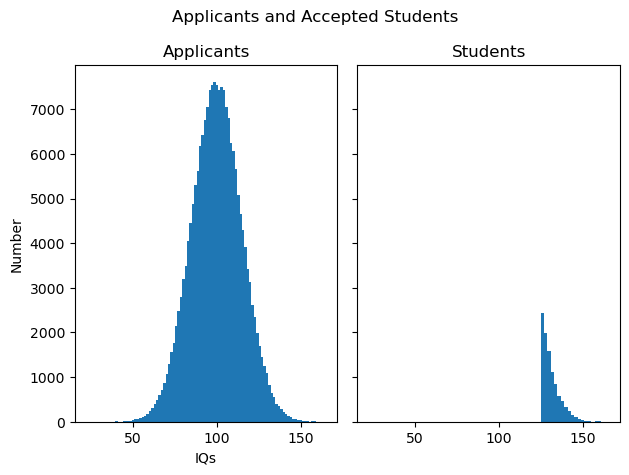

In [6]:
fig, axs = plt.subplots(1, 2, sharey=True, sharex=True, tight_layout=True)

fig.suptitle("Applicants and Accepted Students")

axs[0].set_title("Applicants")
axs[1].set_title("Students")

axs[0].hist(np.concatenate([w_dist, b_dist]), bins=100)
axs[1].hist(np.concatenate([w_accepted, b_accepted]), bins=20)

axs[0].set_ylabel("Number")
axs[0].set_xlabel("IQs")

plt.show()

In [7]:
print("Simulation 1.2: Unequal Thresholds\n")

b_unequal_threshold = 120.558 # value chosen through experimentation to ensure exactly 10,000 students
w_unequal_threshold = b_unequal_threshold + 12

b_accepted = b_dist[(b_dist > b_unequal_threshold)]
w_accepted = w_dist[(w_dist > w_unequal_threshold)]

bw_ratio = b_accepted.size / w_accepted.size
bw_ratio, b_accepted.size, w_accepted.size, b_accepted.size + w_accepted.size

print(f"# Black Students: {b_accepted.size}")
print(f"# White Students: {w_accepted.size}")
print(f"# All Students  : {b_accepted.size + w_accepted.size}")
print(f"B-W Ratio       : {bw_ratio}")
print("")

unequal_threshold_avg = np.average(np.concatenate([b_accepted, w_accepted]))
w_avg = np.average(w_accepted)
b_avg = np.average(b_accepted)

print(f"Black Student Avg: {b_avg}")
print(f"White Student Avg: {w_avg}")
print(f"All Student Avg  : {unequal_threshold_avg}")
print("")

total_iq_point_loss = (equal_threshold_avg - unequal_threshold_avg) * 10000 # =number of students

print(f"Total IQ Loss: {total_iq_point_loss}")

Simulation 1.2: Unequal Thresholds

# Black Students: 8537
# White Students: 1463
# All Students  : 10000
B-W Ratio       : 5.83526999316473

Black Student Avg: 127.45002523652856
White Student Avg: 138.00159439320439
All Student Avg  : 128.99371980415023

Total IQ Loss: 19172.45682186376


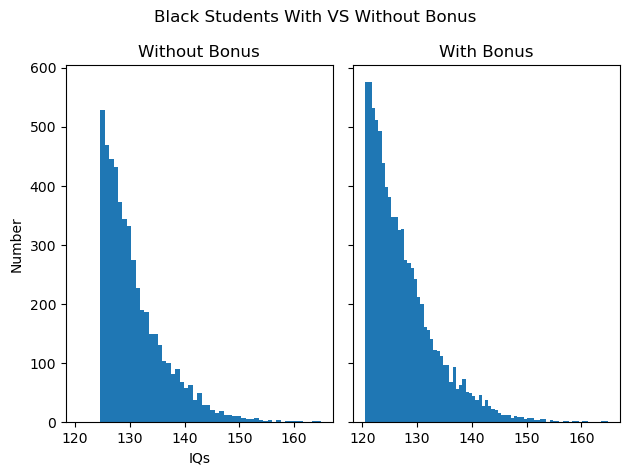

In [8]:
fig, axs = plt.subplots(1, 2, sharey=True, sharex=True, tight_layout=True)

fig.suptitle("Black Students With VS Without Bonus")

axs[0].set_title("Without Bonus")
axs[1].set_title("With Bonus")

axs[0].hist(b_accepted_eq, bins=50)
axs[1].hist(b_accepted, bins=75)

axs[0].set_ylabel("Number")
axs[0].set_xlabel("IQs")

plt.show()

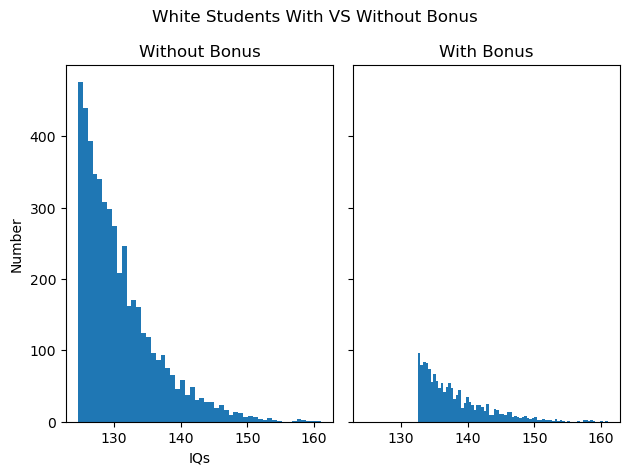

In [9]:
fig, axs = plt.subplots(1, 2, sharey=True, sharex=True, tight_layout=True)

fig.suptitle("White Students With VS Without Bonus")

axs[0].set_title("Without Bonus")
axs[1].set_title("With Bonus")

axs[0].hist(w_accepted_eq, bins=50)
axs[1].hist(w_accepted, bins=75)

axs[0].set_ylabel("Number")
axs[0].set_xlabel("IQs")

plt.show()

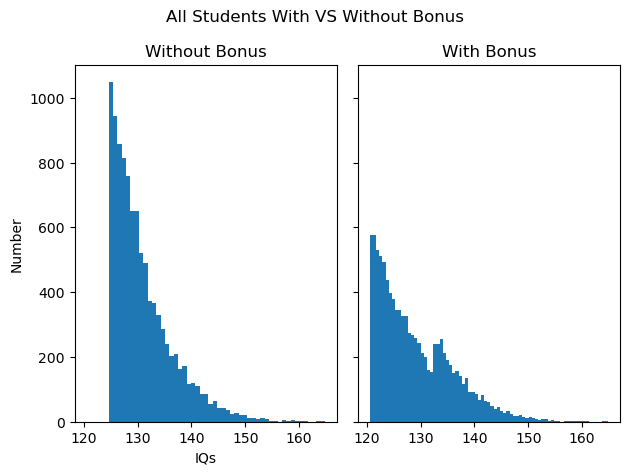

In [10]:
fig, axs = plt.subplots(1, 2, sharey=True, sharex=True, tight_layout=True)

fig.suptitle("All Students With VS Without Bonus")

axs[0].set_title("Without Bonus")
axs[1].set_title("With Bonus")

axs[0].hist(np.concatenate([b_accepted_eq, w_accepted_eq]), bins=50)
axs[1].hist(np.concatenate([w_accepted, b_accepted]), bins=75)

axs[0].set_ylabel("Number")
axs[0].set_xlabel("IQs")

plt.show()

In [11]:
print("Simulation 2: Scores With Bonus Points\n")

min_score = 132.558 # value chosen through experimentation to ensure exactly 10,000 students
b_bonus_points = 12

# Compare applicant to needed score, add bonus points to favored group, if over accept
b_accepted = b_dist[(b_dist + b_bonus_points > min_score)]
w_accepted = w_dist[(w_dist > min_score)]
bw_ratio = b_accepted.size / w_accepted.size

print(f"# Black Students: {b_accepted.size}")
print(f"# White Students: {w_accepted.size}")
print(f"# All Students  : {b_accepted.size + w_accepted.size}")
print(f"B-W Ratio       : {bw_ratio}")
print("")

score_avg = np.average(np.concatenate([b_accepted, w_accepted]))
w_avg = np.average(w_accepted)
b_avg = np.average(b_accepted)

print(f"Black Student Avg: {b_avg}")
print(f"White Student Avg: {w_avg}")
print(f"All Student Avg  : {score_avg}")
print("")

total_iq_point_loss = (equal_threshold_avg - score_avg) * 10000

print(f"Total IQ Loss: {total_iq_point_loss}")

Simulation 2: Scores With Bonus Points

# Black Students: 8537
# White Students: 1463
# All Students  : 10000
B-W Ratio       : 5.83526999316473

Black Student Avg: 127.45002523652856
White Student Avg: 138.00159439320439
All Student Avg  : 128.99371980415023

Total IQ Loss: 19172.45682186376


In [12]:
print("Simulation 3.1: Race-Blind Quotas\n")

total_quota = 10000 # Size of quota chosen to match number of accepted applicants in earlier simulations

# Sort students from low to high, accept only the highest
bw_dist_sorted = np.concatenate([b_dist.copy(), w_dist.copy()])
bw_dist_sorted.sort()
bw_accepted = bw_dist_sorted[-total_quota:]

equal_quota_avg = np.average(bw_accepted)

print(f"All Student Avg  : {equal_quota_avg}")

Simulation 3.1: Race-Blind Quotas

All Student Avg  : 130.91096548633664


In [13]:
print("Simulation 3.2: Race-Aware Quotas\n")

b_unequal_quota = 8537 # Size of quota chosen to match number of accepted applicants in earlier simulations
w_unequal_quota = 1463

b_dist_sorted = b_dist.copy()
b_dist_sorted.sort()
w_dist_sorted = w_dist.copy()
w_dist_sorted.sort()
b_accepted = b_dist_sorted[-b_unequal_quota:]
w_accepted = w_dist_sorted[-w_unequal_quota:]
bw_ratio = b_accepted.size / w_accepted.size

print(f"# Black Students: {b_accepted.size}")
print(f"# White Students: {w_accepted.size}")
print(f"# All Students  : {b_accepted.size + w_accepted.size}")
print(f"B-W Ratio       : {bw_ratio}")
print("")

unequal_quota_avg = np.average(np.concatenate([b_accepted, w_accepted]))
w_avg = np.average(w_accepted)
b_avg = np.average(b_accepted)

print(f"Black Student Avg: {b_avg}")
print(f"White Student Avg: {w_avg}")
print(f"All Student Avg  : {unequal_quota_avg}")
print("")

total_iq_point_loss = (equal_quota_avg - unequal_quota_avg) * 10000

print(f"Total IQ Loss: {total_iq_point_loss}")

Simulation 3.2: Race-Aware Quotas

# Black Students: 8537
# White Students: 1463
# All Students  : 10000
B-W Ratio       : 5.83526999316473

Black Student Avg: 127.45002523652856
White Student Avg: 138.00159439320439
All Student Avg  : 128.99371980415023

Total IQ Loss: 19172.456821864045


In [14]:
print("Uneqal Distribution of Applicants\n")

b_dist_higher = b_dist.copy() + 10
b_dist_lower = b_dist.copy() - 10
print(f"Black Applicant Average, Higher: {np.average(b_dist_higher)}")
print(f"Black Applicant Average, Lower : {np.average(b_dist_lower)}")

Uneqal Distribution of Applicants

Black Applicant Average, Higher: 109.98214610977116
Black Applicant Average, Lower : 89.98214610977116


In [15]:
print("Simulation 4.1: Race-Blind Quotas, Favored Group Higher\n")

total_quota = 10000

bw_dist_sorted = np.concatenate([b_dist_higher.copy(), w_dist.copy()])
bw_dist_sorted.sort()
bw_accepted = bw_dist_sorted[-total_quota:]

bh_equal_quota_avg = np.average(bw_accepted)

print(f"All Student Avg  : {bh_equal_quota_avg}")

Simulation 4.1: Race-Blind Quotas, Favored Group Higher

All Student Avg  : 137.5735177408976


In [16]:
print("Simulation 4.2: Race-Aware Quotas, Favored Group Higher\n")

w_unequal_quota = 1463
b_unequal_quota = 8537

b_dist_sorted = b_dist_higher.copy()
b_dist_sorted.sort()
w_dist_sorted = w_dist.copy()
w_dist_sorted.sort()

b_accepted = b_dist_sorted[-b_unequal_quota:]
w_accepted = w_dist_sorted[-w_unequal_quota:]
bw_ratio = b_accepted.size / w_accepted.size

print(f"# Black Students: {b_accepted.size}")
print(f"# White Students: {w_accepted.size}")
print(f"# All Students  : {b_accepted.size + w_accepted.size}")
print(f"B-W Ratio       : {bw_ratio}")
print("")

bh_unequal_quota_avg = np.average(np.concatenate([b_accepted, w_accepted]))
w_avg = np.average(w_accepted)
b_avg = np.average(b_accepted)

print(f"Black Student Avg: {b_avg}")
print(f"White Student Avg: {w_avg}")
print(f"All Student Avg  : {bh_unequal_quota_avg}")
print("")

total_iq_point_loss = (bh_equal_quota_avg - bh_unequal_quota_avg) * 10000

print(f"Total IQ Loss: {total_iq_point_loss}")

Simulation 4.2: Race-Aware Quotas, Favored Group Higher

# Black Students: 8537
# White Students: 1463
# All Students  : 10000
B-W Ratio       : 5.83526999316473

Black Student Avg: 137.45002523652857
White Student Avg: 138.00159439320439
All Student Avg  : 137.53071980415024

Total IQ Loss: 427.9793674737675


In [17]:
print("Simulation 4.3: Race-Blind Quotas, Favored Group Lower\n")

total_quota = 10000

bw_dist_sorted = np.concatenate([b_dist_lower.copy(), w_dist.copy()])
bw_dist_sorted.sort()
bw_accepted = bw_dist_sorted[-total_quota:]

bl_equal_quota_avg = np.average(bw_accepted)

print(f"All Student Avg  : {bl_equal_quota_avg}")

Simulation 4.3: Race-Blind Quotas, Favored Group Lower

All Student Avg  : 127.48031629621741


In [18]:
print("Simulation 4.4: Race-Aware Quotas, Favored Group Lower\n")

w_unequal_quota = 1463
b_unequal_quota = 8537

b_dist_sorted = b_dist_lower.copy()
b_dist_sorted.sort()
w_dist_sorted = w_dist.copy()
w_dist_sorted.sort()

b_accepted = b_dist_sorted[-b_unequal_quota:]
w_accepted = w_dist_sorted[-w_unequal_quota:]
bw_ratio = b_accepted.size / w_accepted.size

print(f"# Black Students: {b_accepted.size}")
print(f"# White Students: {w_accepted.size}")
print(f"# All Students  : {b_accepted.size + w_accepted.size}")
print(f"B-W Ratio       : {bw_ratio}")
print("")

bl_unequal_quota_avg = np.average(np.concatenate([b_accepted, w_accepted]))
w_avg = np.average(w_accepted)
b_avg = np.average(b_accepted)

print(f"Black Student Avg: {b_avg}")
print(f"White Student Avg: {w_avg}")
print(f"All Student Avg  : {bl_unequal_quota_avg}")
print("")

total_iq_point_loss = (bl_equal_quota_avg - bl_unequal_quota_avg) * 10000

print(f"Total IQ Loss: {total_iq_point_loss}")

Simulation 4.4: Race-Aware Quotas, Favored Group Lower

# Black Students: 8537
# White Students: 1463
# All Students  : 10000
B-W Ratio       : 5.83526999316473

Black Student Avg: 117.45002523652856
White Student Avg: 138.00159439320439
All Student Avg  : 120.45671980415024

Total IQ Loss: 70235.9649206717


In [19]:
print("Simulation 5.1: Scores Without Bonus Points, Equal Discrimination\n")

min_score = 120.4004 # value chosen through experimentation to ensure exactly 10,000 students
b_discrimination = 12

b_accepted = b_dist[(b_dist - b_discrimination > min_score)]
w_accepted = w_dist[(w_dist > min_score)]
bw_ratio = b_accepted.size / w_accepted.size

print(f"# Black Students: {b_accepted.size}")
print(f"# White Students: {w_accepted.size}")
print(f"# All Students  : {b_accepted.size + w_accepted.size}")
print(f"B-W Ratio       : {bw_ratio}")
print("")

eq_d_score_avg = np.average(np.concatenate([b_accepted, w_accepted]))
w_avg = np.average(w_accepted)
b_avg = np.average(b_accepted)

print(f"Black Student Avg: {b_avg}")
print(f"White Student Avg: {w_avg}")
print(f"All Student Avg  : {eq_d_score_avg}")
print("")

total_iq_point_loss = (equal_threshold_avg - eq_d_score_avg) * 10000

print(f"Total IQ Loss: {total_iq_point_loss}")

Simulation 5.1: Scores Without Bonus Points, Equal Discrimination

# Black Students: 1504
# White Students: 8496
# All Students  : 10000
B-W Ratio       : 0.17702448210922786

Black Student Avg: 137.86895977448287
White Student Avg: 127.35978532646854
All Student Avg  : 128.94036516344988

Total IQ Loss: 19706.003228867245


In [20]:
print("Simulation 5.2: Scores With Bonus Points, Equal Discrimination\n")

min_score = 124.635 # value chosen through experimentation to ensure exactly 10,000 students
b_discrimination = 12
b_bonus_points = 12

b_accepted = b_dist[(b_dist - b_discrimination + b_bonus_points > min_score)]
w_accepted = w_dist[(w_dist > min_score)]
bw_ratio = b_accepted.size / w_accepted.size

print(f"# Black Students: {b_accepted.size}")
print(f"# White Students: {w_accepted.size}")
print(f"# All Students  : {b_accepted.size + w_accepted.size}")
print(f"B-W Ratio       : {bw_ratio}")
print("")

bp_eq_d_score_avg = np.average(np.concatenate([b_accepted, w_accepted]))
w_avg = np.average(w_accepted)
b_avg = np.average(b_accepted)

print(f"Black Student Avg: {b_avg}")
print(f"White Student Avg: {w_avg}")
print(f"All Student Avg  : {bp_eq_d_score_avg}")
print("")

total_iq_point_loss = (equal_threshold_avg - bp_eq_d_score_avg) * 10000

print(f"Total IQ Loss: {total_iq_point_loss}")

Simulation 5.2: Scores With Bonus Points, Equal Discrimination

# Black Students: 5061
# White Students: 4939
# All Students  : 10000
B-W Ratio       : 1.0247013565499088

Black Student Avg: 130.882023235439
White Student Avg: 130.94062265009305
All Student Avg  : 130.9109654863366

Total IQ Loss: 0.0


In [21]:
print("Variable Discrimination Distribution\n")
print("")

# Average discrimination equal to 12 IQ points with SD of 6
variable_discrimination = 6 * rng.standard_normal(num_applicants) + 12

print(f"Discrimination Average: {np.average(variable_discrimination)}")
print(f"Discrimination Std Dev: {np.std(variable_discrimination)}")

Variable Discrimination Distribution


Discrimination Average: 11.985067058424853
Discrimination Std Dev: 5.978718709064072


In [22]:
print("Simulation 6.1: Scores Without Bonus Points, Variable Discrimination\n")

min_score = 120.931 # value chosen through experimentation to ensure exactly 10,000 students

b_accepted = b_dist[(b_dist - variable_discrimination > min_score)]
w_accepted = w_dist[(w_dist > min_score)]
bw_ratio = b_accepted.size / w_accepted.size

b_accepted_nbwb = b_accepted # will use later
w_accepted_nbwb = w_accepted

print(f"# Black Students: {b_accepted.size}")
print(f"# White Students: {w_accepted.size}")
print(f"# All Students  : {b_accepted.size + w_accepted.size}")
print(f"B-W Ratio       : {bw_ratio}")
print("")

vd_eq_d_score_avg = np.average(np.concatenate([b_accepted, w_accepted]))
w_avg = np.average(w_accepted)
b_avg = np.average(b_accepted)

print(f"Black Student Avg: {b_avg}")
print(f"White Student Avg: {w_avg}")
print(f"All Student Avg  : {vd_eq_d_score_avg}")
print("")

total_iq_point_loss = (equal_threshold_avg - vd_eq_d_score_avg) * 10000

print(f"Total IQ Loss: {total_iq_point_loss}")

Simulation 6.1: Scores Without Bonus Points, Variable Discrimination

# Black Students: 2041
# White Students: 7959
# All Students  : 10000
B-W Ratio       : 0.2564392511622063

Black Student Avg: 133.57169686302123
White Student Avg: 127.81217936296865
All Student Avg  : 128.98769688472936

Total IQ Loss: 19232.68601607248


In [23]:
print("Simulation 6.2: Scores With Bonus Points, Variable Discrimination, Points Equal Average Discrimination\n")

min_score = 125.50965 # value chosen through experimentation to ensure exactly 10,000 students
b_bonus_points = 12

b_accepted = b_dist[(b_dist - variable_discrimination + b_bonus_points > min_score)]
w_accepted = w_dist[(w_dist > min_score)]
bw_ratio = b_accepted.size / w_accepted.size

print(f"# Black Students: {b_accepted.size}")
print(f"# White Students: {w_accepted.size}")
print(f"# All Students  : {b_accepted.size + w_accepted.size}")
print(f"B-W Ratio       : {bw_ratio}")
print("")

bp_vd_score_avg = np.average(np.concatenate([b_accepted, w_accepted]))
w_avg = np.average(w_accepted)
b_avg = np.average(b_accepted)

print(f"Black Student Avg: {b_avg}")
print(f"White Student Avg: {w_avg}")
print(f"All Student Avg  : {bp_vd_score_avg}")
print("")

total_iq_point_loss = (equal_threshold_avg - bp_vd_score_avg) * 10000

print(f"Total IQ Loss: {total_iq_point_loss}")

Simulation 6.2: Scores With Bonus Points, Variable Discrimination, Points Equal Average Discrimination

# Black Students: 5627
# White Students: 4373
# All Students  : 10000
B-W Ratio       : 1.28675966155957

Black Student Avg: 127.96226148433269
White Student Avg: 131.7008719475975
All Student Avg  : 129.5971558399184

Total IQ Loss: 13138.09646418207


In [24]:
print("Simulation 6.2: Scores With Bonus Points, Variable Discrimination, Points Below Average Discrimination\n")

min_score = 122.835 # value chosen through experimentation to ensure exactly 10,000 students
b_bonus_points = 6

b_accepted = b_dist[(b_dist - variable_discrimination + b_bonus_points > min_score)]
w_accepted = w_dist[(w_dist > min_score)]
bw_ratio = b_accepted.size / w_accepted.size

print(f"# Black Students: {b_accepted.size}")
print(f"# White Students: {w_accepted.size}")
print(f"# All Students  : {b_accepted.size + w_accepted.size}")
print(f"B-W Ratio       : {bw_ratio}")
print("")

lbp_vd_eq_d_score_avg = np.average(np.concatenate([b_accepted, w_accepted]))
w_avg = np.average(w_accepted)
b_avg = np.average(b_accepted)

print(f"Black Student Avg: {b_avg}")
print(f"White Student Avg: {w_avg}")
print(f"All Student Avg  : {lbp_vd_eq_d_score_avg}")
print("")

total_iq_point_loss = (equal_threshold_avg - lbp_vd_eq_d_score_avg) * 10000

print(f"Total IQ Loss: {total_iq_point_loss}")

Simulation 6.2: Scores With Bonus Points, Variable Discrimination, Points Below Average Discrimination

# Black Students: 3669
# White Students: 6331
# All Students  : 10000
B-W Ratio       : 0.57952930026852

Black Student Avg: 130.38666703699894
White Student Avg: 129.34743666565265
All Student Avg  : 129.72873028889958

Total IQ Loss: 11822.351974370235


In [25]:
print("Simulation 6.3: Scores With Bonus Points, Variable Discrimination, Points Above Average Discrimination\n")

min_score = 129.242 # value chosen through experimentation to ensure exactly 10,000 students
b_bonus_points = 18

b_accepted = b_dist[(b_dist - variable_discrimination + b_bonus_points > min_score)]
w_accepted = w_dist[(w_dist > min_score)]
bw_ratio = b_accepted.size / w_accepted.size

print(f"# Black Students: {b_accepted.size}")
print(f"# White Students: {w_accepted.size}")
print(f"# All Students  : {b_accepted.size + w_accepted.size}")
print(f"B-W Ratio       : {bw_ratio}")
print("")

hbp_vd_score_avg = np.average(np.concatenate([b_accepted, w_accepted]))
w_avg = np.average(w_accepted)
b_avg = np.average(b_accepted)

print(f"Black Student Avg: {b_avg}")
print(f"White Student Avg: {w_avg}")
print(f"All Student Avg  : {hbp_vd_score_avg}")
print("")

total_iq_point_loss = (equal_threshold_avg - hbp_vd_score_avg) * 10000

print(f"Total IQ Loss: {total_iq_point_loss}")

Simulation 6.3: Scores With Bonus Points, Variable Discrimination, Points Above Average Discrimination

# Black Students: 7467
# White Students: 2533
# All Students  : 10000
B-W Ratio       : 2.9478878799842083

Black Student Avg: 126.27417718125508
White Student Avg: 134.9378337703748
All Student Avg  : 128.4686813952791

Total IQ Loss: 24422.840910575018


In [26]:
# Semi-Automated Test for Optimal Bonus Points

quota = 10000
b_bonus_points = 8.343

# Race must be a number otherwise there's some dtype conflict with argsort()
w_race = np.full((num_applicants), 0)
b_race = np.full((num_applicants), 1)

bonus_points_arr = np.arange(8.34,8.35,0.001)
decimals = 3

for i in bonus_points_arr:
    
    # Pair each applicant's true IQ with their apparent IQ due to discrimination, also mark race
    b_dist_2d = np.stack((b_dist, b_dist - variable_discrimination + round(i,decimals), b_race), axis=-1)
    w_dist_2d = np.stack((w_dist, w_dist, w_race), axis=-1)
    
    both_dist_2d = np.concatenate([b_dist_2d, w_dist_2d])
    both_dist_2d_sorted = both_dist_2d[both_dist_2d[:, 1].argsort()] # sort array by second column
    
    both_accepted_2d = both_dist_2d_sorted[-quota:]
    
    w_accepted_2d = both_accepted_2d[(np.transpose(both_accepted_2d)[2] == 0)]
    b_accepted_2d = both_accepted_2d[(np.transpose(both_accepted_2d)[2] == 1)]
    
    #w_accepted_IQs = np.transpose(w_accepted_2d)[0]
    #b_accepted_IQs = np.transpose(b_accepted_2d)[0]
    all_accepted_IQs = np.transpose(both_accepted_2d)[0]
    """
    print(f"# Black Students: {b_accepted_IQs.size}")
    print(f"# White Students: {w_accepted_IQs.size}")
    print(f"# All Students  : {b_accepted_IQs.size + w_accepted_IQs.size}")
    print(f"B-W Ratio       : {b_accepted_IQs.size / w_accepted_IQs.size}")
    print("")
    
    print(f"Black Student Avg: {np.average(b_accepted_IQs)}")
    print(f"White Student Avg: {np.average(w_accepted_IQs)}")
    print(f"All Student Avg  : {np.average(all_accepted_IQs)}")
    print("")
    """
    total_iq_point_loss = (equal_quota_avg - np.average(all_accepted_IQs)) * 10000

    print(f"{round(i,decimals)}|{total_iq_point_loss}")

# values between 8.341-8.346 produce the lowest values IQ loss of 10843.009879693283
# values between 8.345-8.349 reduce losses most for seed 123456789
# Seeds | Optimal points
# 1 | 8.352-8.357
# 2 | 8.351-8.353
# 3 | 8.355
# 4 | 8.414-8.415
# 5 | 8.386

8.34|10851.698506912158
8.341|10843.009879693283
8.342|10843.009879693283
8.343|10843.009879693283
8.344|10843.009879693283
8.345|10843.009879693283
8.346|10843.009879693283
8.347|10848.39543046769
8.348|10844.566347613238
8.349|10844.566347613238


In [27]:
print("Simulation 6.4: Scores With Bonus Points, Variable Discrimination, Optimal Bonus Points\n")

min_score = 123.741 # value chosen through experimentation to ensure exactly 10,000 students
b_bonus_points = 8.343 # value chosen through experimentation to produce minimal IQ loss

b_accepted = b_dist[(b_dist - variable_discrimination + b_bonus_points > min_score)]
w_accepted = w_dist[(w_dist > min_score)]
bw_ratio = b_accepted.size / w_accepted.size

print(f"# Black Students: {b_accepted.size}")
print(f"# White Students: {w_accepted.size}")
print(f"# All Students  : {b_accepted.size + w_accepted.size}")
print(f"B-W Ratio       : {bw_ratio}")
print("")

op_vd_score_avg = np.average(np.concatenate([b_accepted, w_accepted]))
w_avg = np.average(w_accepted)
b_avg = np.average(b_accepted)

print(f"Black Student Avg: {b_avg}")
print(f"White Student Avg: {w_avg}")
print(f"All Student Avg  : {op_vd_score_avg}")
print("")

total_iq_point_loss = (equal_threshold_avg - op_vd_score_avg) * 10000

print(f"Total IQ Loss: {total_iq_point_loss}")

Simulation 6.4: Scores With Bonus Points, Variable Discrimination, Optimal Bonus Points

# Black Students: 4415
# White Students: 5585
# All Students  : 10000
B-W Ratio       : 0.7905102954341987

Black Student Avg: 129.40832673163456
White Student Avg: 130.1573648099385
All Student Avg  : 129.8266644983673

Total IQ Loss: 10843.009879693


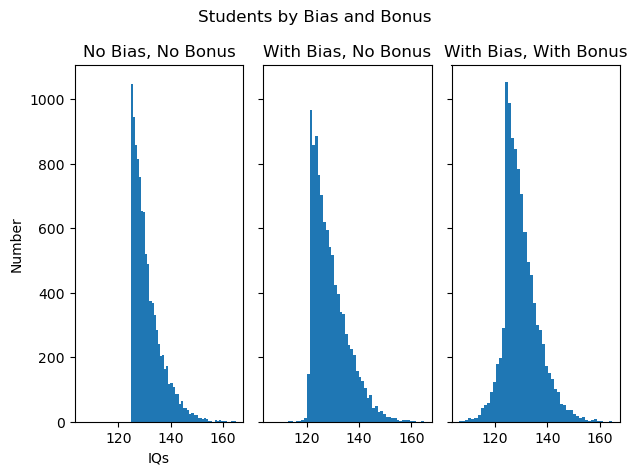

In [33]:
fig, axs = plt.subplots(1, 3, sharey=True, sharex=True, tight_layout=True)

fig.suptitle("Students by Bias and Bonus")

axs[0].set_title("No Bias, No Bonus")
axs[1].set_title("With Bias, No Bonus")
axs[2].set_title("With Bias, With Bonus")

axs[0].hist(np.concatenate([w_accepted_eq, b_accepted_eq]), bins=50)
axs[1].hist(np.concatenate([b_accepted_nbwb, w_accepted_nbwb]), bins=50)
axs[2].hist(np.concatenate([b_accepted, w_accepted]), bins=50)

axs[0].set_ylabel("Number")
axs[0].set_xlabel("IQs")

plt.show()